# The Sower


# Forecast

As a final step, we will run a forecast.

Unfortunately, the sample had few signifiers,

- Only 2 entities (books) 
- Only `soldunits` and `subscriptionunits` are significant

What we can do instead is run a preliminary ARIMA model to forest. Facebook's Prophet has straighforward interface and we are going to use it,

In [1]:
import pandas as pd

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

Importing plotly failed. Interactive plots will not work.


## Data

In [2]:
df = pd.read_csv("../data/interim/sower.csv")

## The Walking Dead

Let's forecast the sales of "The Walking Dead" 1 year ahead using a ARIMA model. ARIMA is a autoregressive model, so we are assuming the variable depends linearly on its own previous values 

In [3]:
# working df
wdf = df[(df["entity"] == "The Walking Dead") & (df["formattype"] == "print")]
wdf = wdf[["todate", "soldunits"]] 
wdf = wdf.rename({"todate": "ds", "soldunits": "y"}, axis=1)

In [4]:
#Prophet will by default fit weekly and yearly seasonalities
m = Prophet()
#m.add_seasonality(name='monthly', period=2, fourier_order=10)
m.fit(wdf)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1221,2020-08-22,90.454691,34.326959,142.721802
1222,2020-08-23,78.603874,25.535513,126.074269
1223,2020-08-24,80.322903,27.868656,133.953494
1224,2020-08-25,99.411976,46.141597,152.943165
1225,2020-08-26,103.645546,48.433827,157.150292


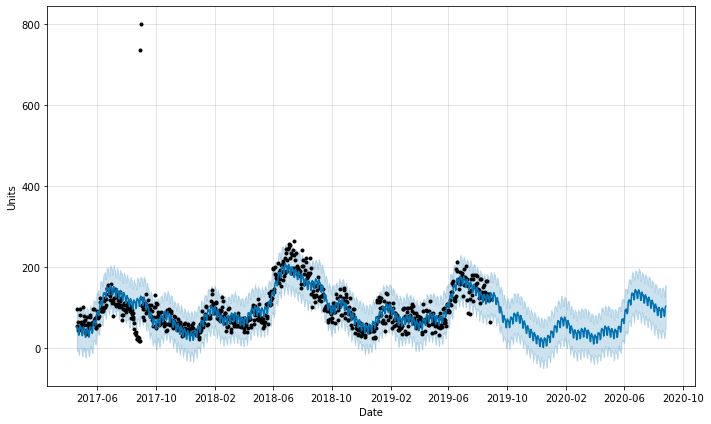

In [6]:
fig = m.plot(forecast, xlabel="Date", ylabel="Units")
#a = add_changepoints_to_plot(fig.gca(), m, forecast)

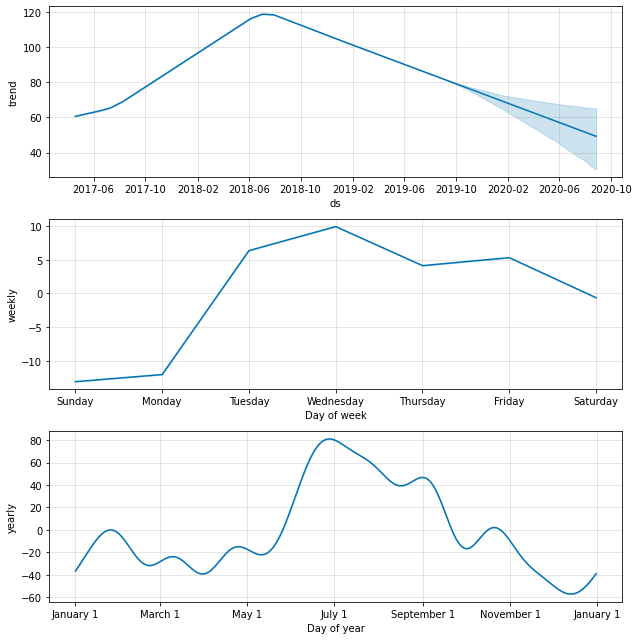

In [7]:
fig = m.plot_components(forecast)